In [82]:
import numpy as np
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pylab as pl
from collections import Counter
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10

In [47]:
print(os.getcwd())

/home/pfgr/DS_Bootcamp/project


In [48]:
years = list(range(1990,2018))
months = list(range(1,13))

In [49]:
data = {}
for year in years:
    data[year] = pd.read_csv('./International_flights/data/'+str(year)+'.csv', low_memory=False)

In [50]:
annual_flights = {}
for year in years:
    annual_flights[year] = len(data[year])

In [51]:
monthly_flights = {}
for year in years:
    for month in range(1,10):
        monthly_flights[str(year)+'_0'+str(month)] = len(data[year][data[year].MONTH == month])
    for month in range(10,13):
        monthly_flights[str(year)+'_'+str(month)] = len(data[year][data[year].MONTH == month])

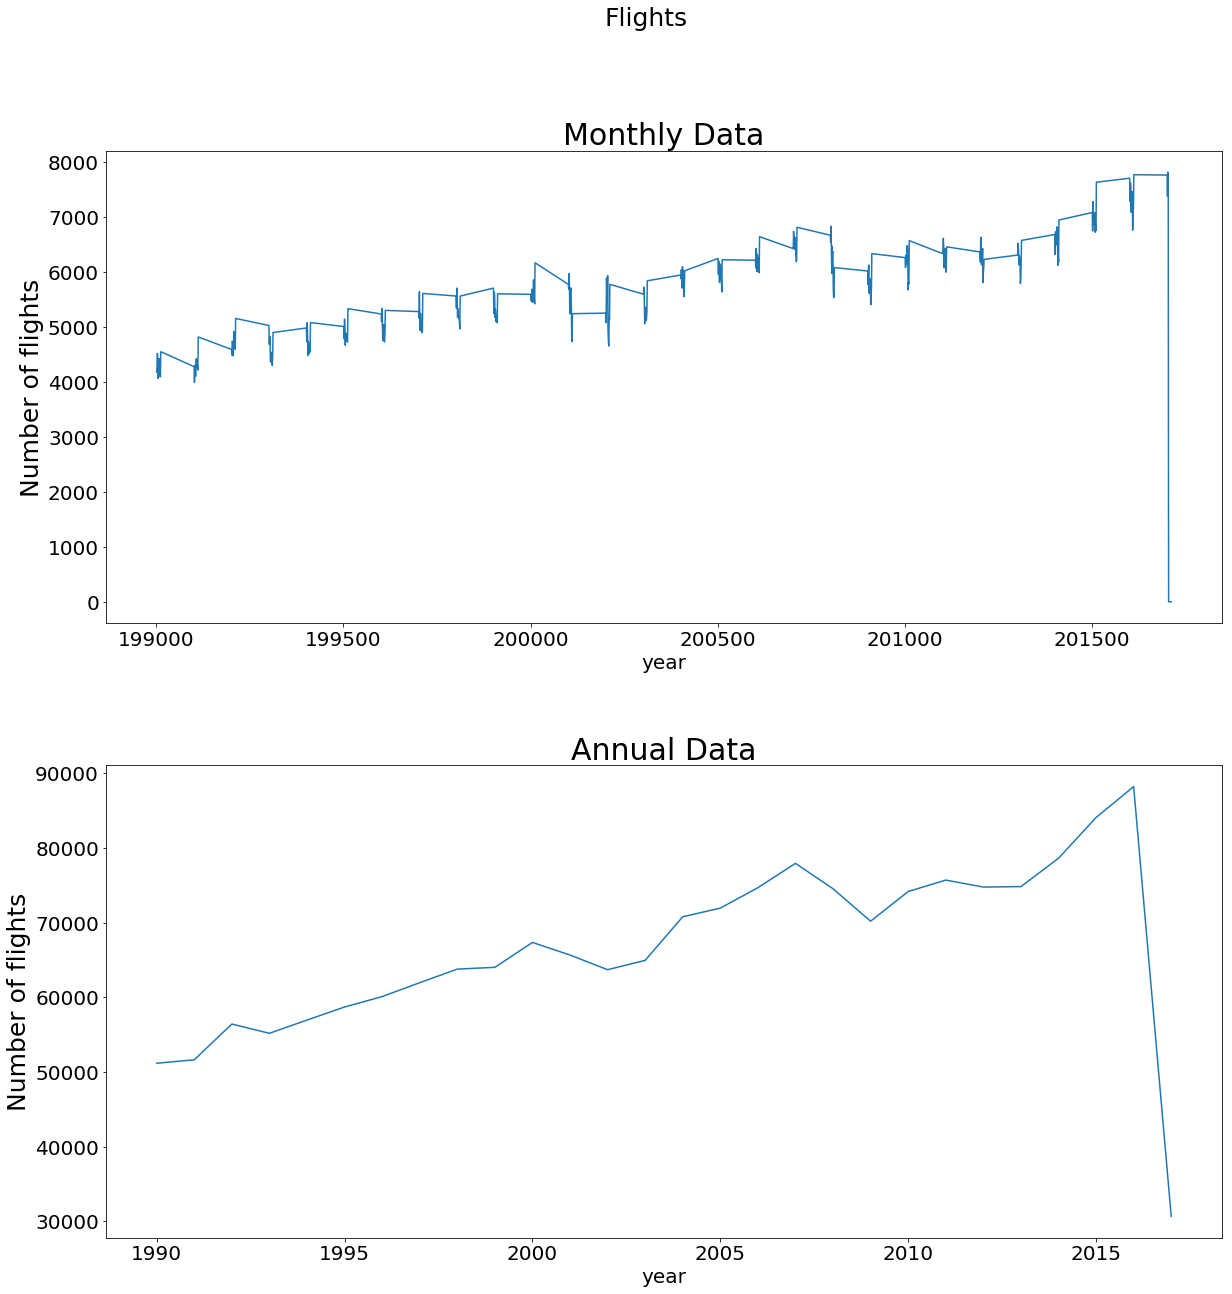

In [143]:
figa = plt.figure()
plt.rcParams['figure.figsize'] = 20, 20
figa.suptitle('Flights', fontsize=25)
figa.subplots_adjust(hspace=0.3)

suba = plt.subplot(211)
plt.plot(*zip(*sorted(monthly_flights.items())))
suba.set_title('Monthly Data', fontsize=30)
plt.xlabel('year', fontsize=20)
plt.ylabel('Number of flights', fontsize=25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

subb = plt.subplot(212)
plt.plot(*zip(*sorted(annual_flights.items())))
subb.set_title('Annual Data', fontsize=30)
plt.xlabel('year', fontsize=20)
plt.ylabel('Number of flights', fontsize=25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [144]:
# plt.plot(*zip(*sorted(annual_flights.items())))
# plt.show()

In [9]:
sum_data = {}
for year in years:
    sum_data[year] = data[year].describe()

In [10]:
passengers = {}
for year in years:
    passengers[year] = sum_data

In [11]:
data[1990].columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_COUNTRY',
       'DEST_COUNTRY_NAME', 'DEST_WAC', 'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE',
       'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER', 'MONTH', 'DISTANCE_GROUP',
       'CLASS', 'Unnamed: 43'],
      dtype='object')

In [12]:
data[1999]

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,Unnamed: 43
0,0.0,1.0,110000.0,0.0,0.0,0.0,0.0,813.0,118.0,102.0,...,5,7,715,2,1999,1,1,2,G,NaN
1,0.0,1.0,46500.0,0.0,0.0,36711.0,0.0,813.0,106.0,99.0,...,5,7,715,2,1999,2,4,2,P,NaN
2,0.0,1.0,46500.0,0.0,0.0,36700.0,0.0,926.0,133.0,122.0,...,5,7,715,2,1999,2,4,2,P,NaN
3,0.0,2.0,93000.0,0.0,0.0,2030.0,0.0,813.0,220.0,196.0,...,854,7,715,2,1999,2,4,2,P,NaN
4,0.0,4.0,186000.0,0.0,0.0,2990.0,0.0,813.0,463.0,406.0,...,854,7,715,2,1999,3,7,2,P,NaN
5,0.0,2.0,89112.0,0.0,0.0,0.0,0.0,813.0,230.0,191.0,...,854,7,715,2,1999,3,7,2,G,NaN
6,0.0,3.0,133668.0,0.0,0.0,0.0,0.0,813.0,419.0,353.0,...,5,7,715,2,1999,3,7,2,G,NaN
7,0.0,3.0,139500.0,0.0,0.0,132688.0,0.0,813.0,346.0,314.0,...,5,7,715,2,1999,3,7,2,P,NaN
8,0.0,1.0,46500.0,0.0,0.0,42993.0,0.0,926.0,133.0,114.0,...,5,7,715,2,1999,3,7,2,P,NaN
9,0.0,12.0,558000.0,0.0,0.0,5860.0,0.0,813.0,1377.0,1199.0,...,854,7,715,2,1999,3,8,2,P,NaN


In [13]:
tot_pass = {}
tot_seats = {}
tot_freight = {}
tot_mail = {}
tot_payload = {}
tot_scheduled = {}
tot_departures = {}
for year in years:
    tot_pass[year] = sum(data[year].PASSENGERS)
    tot_seats[year] = sum(data[year].SEATS)
    tot_freight[year] = sum(data[year].FREIGHT)
    tot_mail[year] = sum(data[year].MAIL)
    tot_payload[year] = sum(data[year].PAYLOAD)
    tot_scheduled[year] = sum(data[year].DEPARTURES_SCHEDULED)
    tot_departures[year] = sum(data[year].DEPARTURES_PERFORMED)

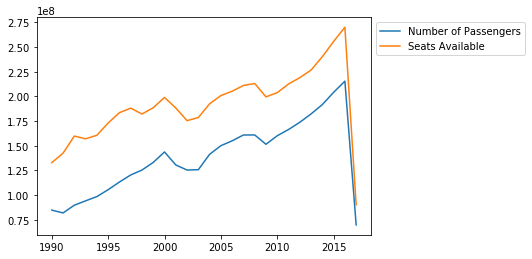

In [14]:
plt.plot(*zip(*sorted(tot_pass.items())), label = 'Number of Passengers')
plt.plot(*zip(*sorted(tot_seats.items())), label = 'Seats Available')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

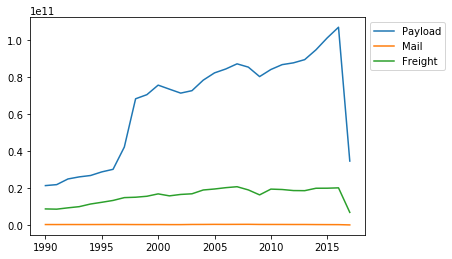

In [15]:
plt.plot(*zip(*sorted(tot_payload.items())), label = 'Payload')
plt.plot(*zip(*sorted(tot_mail.items())), label = 'Mail')
plt.plot(*zip(*sorted(tot_freight.items())), label = 'Freight')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

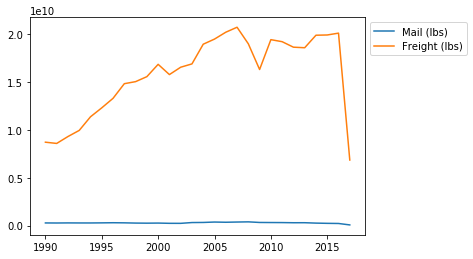

In [16]:
plt.plot(*zip(*sorted(tot_mail.items())), label = 'Mail (lbs)')
plt.plot(*zip(*sorted(tot_freight.items())), label = 'Freight (lbs)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

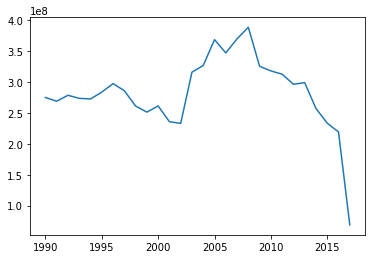

In [17]:
plt.plot(*zip(*sorted(tot_mail.items())), label = 'Mail')

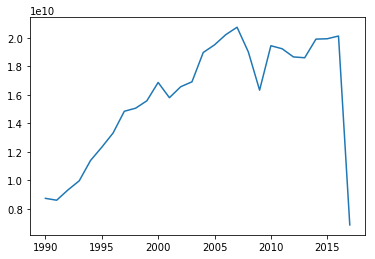

In [18]:
plt.plot(*zip(*sorted(tot_freight.items())), label = 'Freight (lbs)')

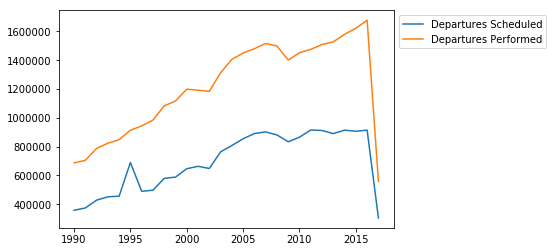

In [19]:
plt.plot(*zip(*sorted(tot_scheduled.items())), label = 'Departures Scheduled')
plt.plot(*zip(*sorted(tot_departures.items())), label = 'Departures Performed')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [20]:
tot_pass_co = {}
tot_seats_co = {}
tot_freight_co = {}
tot_mail_co = {}
tot_payload_co = {}
tot_scheduled_co = {}
tot_departures_co = {}
for year in years:
    tot_pass_co[year] = sum(data[year][data[year].ORIGIN_COUNTRY == 'CO'].PASSENGERS)
    tot_seats_co[year] = sum(data[year][data[year].ORIGIN_COUNTRY == 'CO'].SEATS)
    tot_freight_co[year] = sum(data[year][data[year].ORIGIN_COUNTRY == 'CO'].FREIGHT)
    tot_mail_co[year] = sum(data[year][data[year].ORIGIN_COUNTRY == 'CO'].MAIL)
    tot_payload_co[year] = sum(data[year][data[year].ORIGIN_COUNTRY == 'CO'].PAYLOAD)
    tot_scheduled_co[year] = sum(data[year][data[year].ORIGIN_COUNTRY == 'CO'].DEPARTURES_SCHEDULED)
    tot_departures_co[year] = sum(data[year][data[year].ORIGIN_COUNTRY == 'CO'].DEPARTURES_PERFORMED)

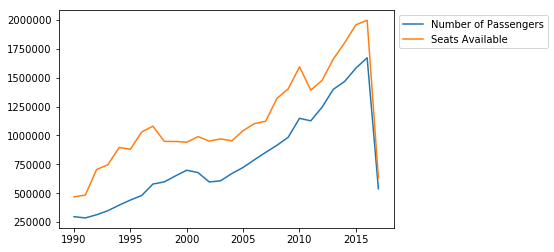

In [21]:
plt.plot(*zip(*sorted(tot_pass_co.items())), label = 'Number of Passengers')
plt.plot(*zip(*sorted(tot_seats_co.items())), label = 'Seats Available')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

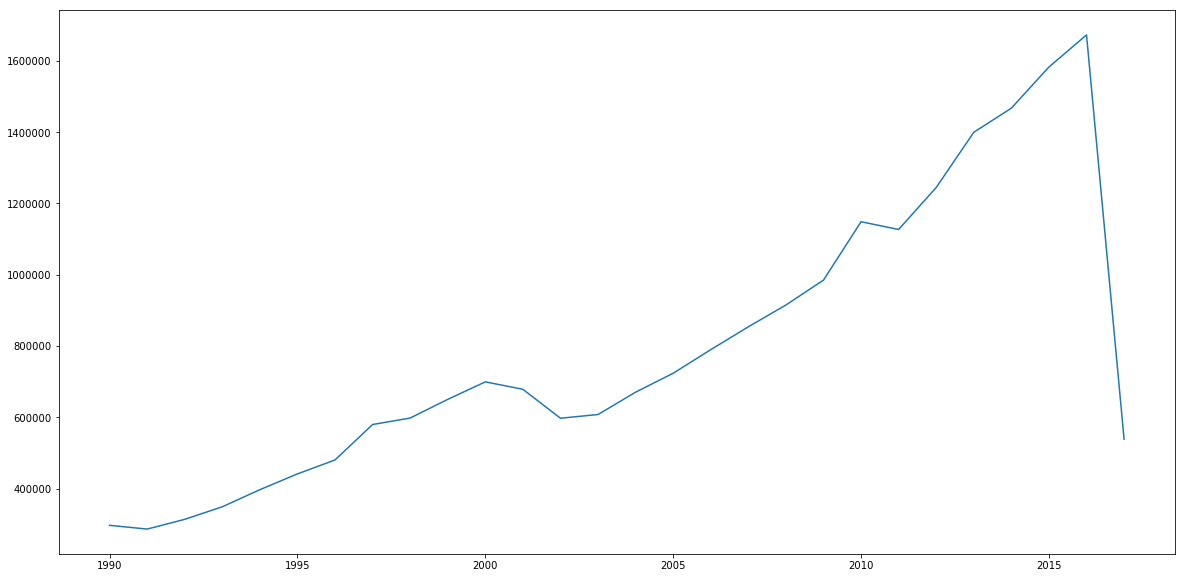

In [99]:
plt.plot(*zip(*sorted(tot_pass_co.items())), label = 'Number of Passengers')
plt.show()

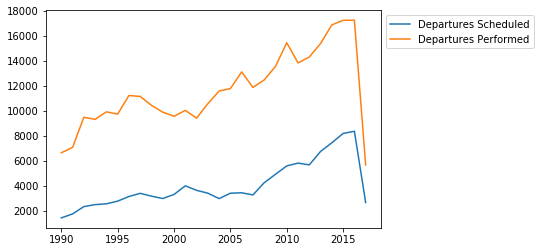

In [23]:
plt.plot(*zip(*sorted(tot_scheduled_co.items())), label = 'Departures Scheduled')
plt.plot(*zip(*sorted(tot_departures_co.items())), label = 'Departures Performed')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

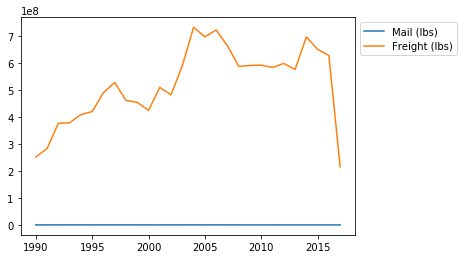

In [24]:
plt.plot(*zip(*sorted(tot_mail_co.items())), label = 'Mail (lbs)')
plt.plot(*zip(*sorted(tot_freight_co.items())), label = 'Freight (lbs)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

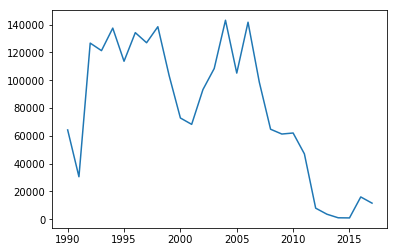

In [25]:
plt.plot(*zip(*sorted(tot_mail_co.items())), label = 'Mail (lbs)')
#plt.xticks(list(range(0,28)), years, rotation='vertical')
plt.show()

In [26]:
# visited_countries = {}
# countries = str()
# for country in data[1990].DEST_COUNTRY_NAME:
#     if country != 'United States':
#         visited_countries[country] = visited_countries.get(country, 0)+1
# #        countries += str.replace(country.upper(), ' ', '_') + ' '
# visited_countries

In [27]:
visited_countries = {}
most_visited = {}
for year in years:
    visited = {}
    for country in data[year].DEST_COUNTRY_NAME:
        if country != 'United States':# and country != 'Canada' and country != 'Mexico':
            visited[country] = visited.get(country, 0)+1
    visited_countries[year] = visited
#     most_visited[year] = {v:k for k, v in visited_countries[year].items()}
#     most_visited[year] = sorted(most_visited[year].items(), reverse = True)

In [28]:
# #Top 10
# sorted(visited_countries[1990].items(), reverse = True)

[('Yugoslavia', 72),
 ('West Germany', 788),
 ('Venezuela', 448),
 ('Uruguay', 7),
 ('United Kingdom', 1896),
 ('U.S.S.R.', 63),
 ('Turks and Caicos Islands', 87),
 ('Turkey', 5),
 ('Trinidad and Tobago', 76),
 ('Tonga', 19),
 ('The Gambia', 11),
 ('The Bahamas', 848),
 ('Taiwan', 129),
 ('Switzerland', 299),
 ('Sweden', 117),
 ('Suriname', 46),
 ('Spain', 280),
 ('South Korea', 334),
 ('Sierra Leone', 1),
 ('Senegal', 13),
 ('Saudi Arabia', 37),
 ('Samoa', 29),
 ('Saint Lucia', 48),
 ('Saint Kitts and Nevis', 60),
 ('Romania', 2),
 ('Portugal', 143),
 ('Poland', 81),
 ('Philippines', 100),
 ('Peru', 187),
 ('Paraguay', 67),
 ('Papua New Guinea', 22),
 ('Panama', 186),
 ('Pakistan', 3),
 ('Oman', 1),
 ('Norway', 52),
 ('Nigeria', 12),
 ('Nicaragua', 75),
 ('New Zealand', 119),
 ('New Caledonia', 7),
 ('Netherlands Antilles', 309),
 ('Netherlands', 793),
 ('Nauru', 12),
 ('Morocco', 26),
 ('Mexico', 2921),
 ('Martinique', 39),
 ('Marshall Islands', 49),
 ('Malaysia', 14),
 ('Luxembourg'

In [29]:
# most_visited = {v:k for k, v in visited_countries.items()}
# most_visited

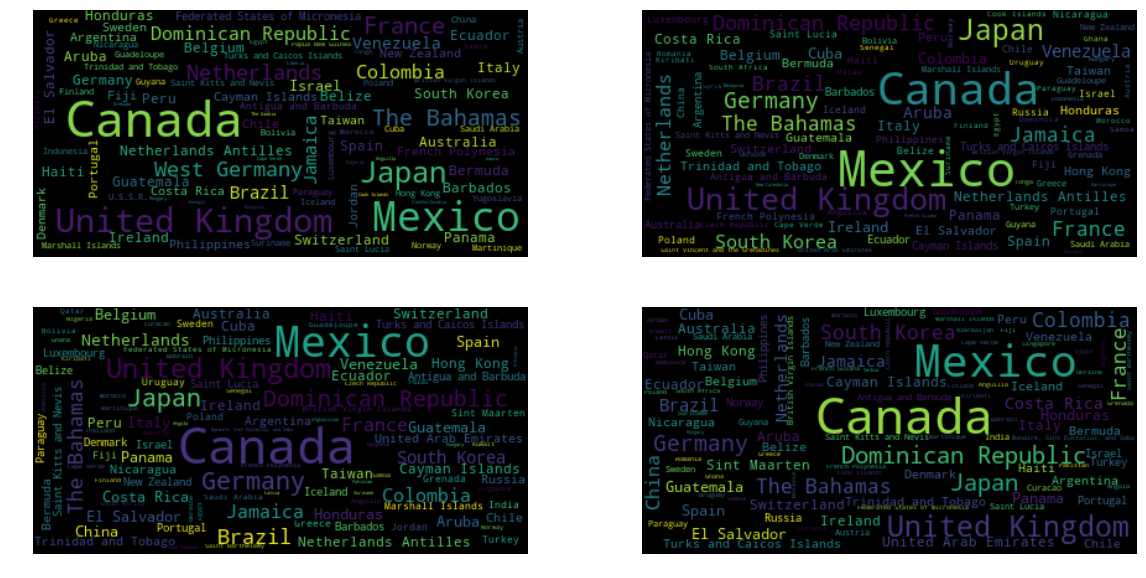

In [58]:
wordcloud1 = WordCloud(background_color='black').generate_from_frequencies(visited_countries[1990], max_font_size=40)
wordcloud2 = WordCloud(background_color='black').generate_from_frequencies(visited_countries[2000], max_font_size=40)
wordcloud3 = WordCloud(background_color='black').generate_from_frequencies(visited_countries[2010], max_font_size=40)
wordcloud4 = WordCloud(background_color='black').generate_from_frequencies(visited_countries[2016], max_font_size=40)
plt.rcParams['figure.figsize'] = 20, 10
plt.figure()
plt.subplot(221)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.subplot(222)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.subplot(223)
plt.imshow(wordcloud3, interpolation="bilinear")
plt.axis("off")
plt.subplot(224)
plt.imshow(wordcloud4, interpolation="bilinear")
plt.axis("off")
plt.show()

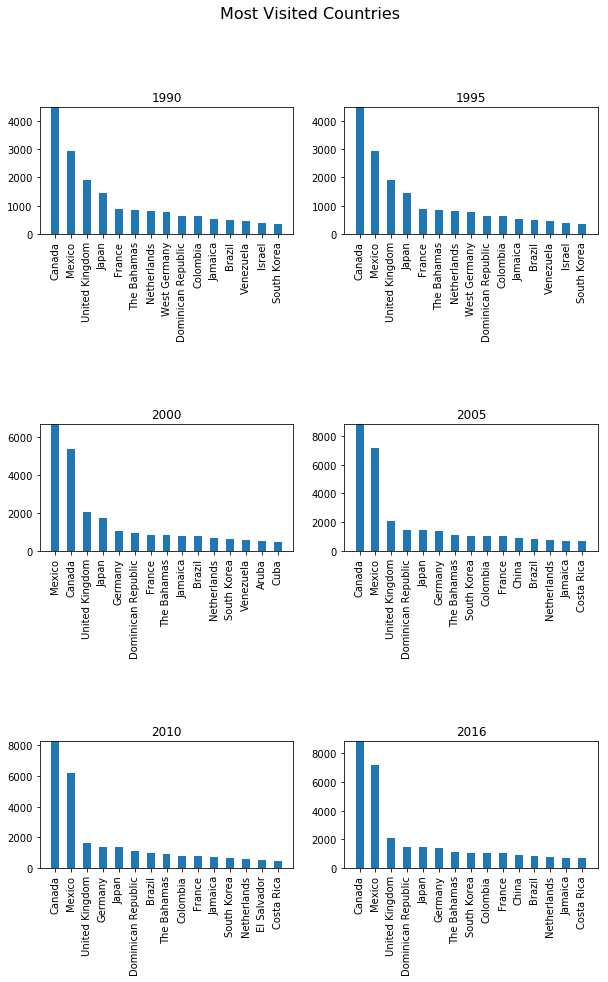

In [72]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = 10, 14
fig.suptitle('Most Visited Countries', fontsize=16)
fig.subplots_adjust(hspace=1.5)

sub1 = plt.subplot(321)
d = dict(Counter(visited_countries[1990]).most_common(15))
X = np.arange(len(d))
sub1.set_title('1990')
pl.bar(X, sorted(d.values(), reverse = True), align='center', width=0.5)
pl.xticks(X, d.keys(), rotation='vertical')
ymax = max(d.values()) + 1
pl.ylim(0, ymax)

sub2 = plt.subplot(322)
d = dict(Counter(visited_countries[1990]).most_common(15))
X = np.arange(len(d))
sub2.set_title('1995')
pl.bar(X, sorted(d.values(), reverse = True), align='center', width=0.5)
pl.xticks(X, d.keys(), rotation='vertical')
ymax = max(d.values()) + 1
pl.ylim(0, ymax)

sub3 = plt.subplot(323)
d = dict(Counter(visited_countries[2000]).most_common(15))
X = np.arange(len(d))
sub3.set_title('2000')
pl.bar(X, sorted(d.values(), reverse = True), align='center', width=0.5)
pl.xticks(X, d.keys(), rotation='vertical')
ymax = max(d.values()) + 1
pl.ylim(0, ymax)

sub4 = plt.subplot(324)
d = dict(Counter(visited_countries[2016]).most_common(15))
X = np.arange(len(d))
sub4.set_title('2005')
pl.bar(X, sorted(d.values(), reverse = True), align='center', width=0.5)
pl.xticks(X, d.keys(), rotation='vertical')
ymax = max(d.values()) + 1
pl.ylim(0, ymax)

sub5 = plt.subplot(325)
d = dict(Counter(visited_countries[2010]).most_common(15))
X = np.arange(len(d))
sub5.set_title('2010')
pl.bar(X, sorted(d.values(), reverse = True), align='center', width=0.5)
pl.xticks(X, d.keys(), rotation='vertical')
ymax = max(d.values()) + 1
pl.ylim(0, ymax)

sub6 = plt.subplot(326)
d = dict(Counter(visited_countries[2016]).most_common(15))
X = np.arange(len(d))
sub6.set_title('2016')
pl.bar(X, sorted(d.values(), reverse = True), align='center', width=0.5)
pl.xticks(X, d.keys(), rotation='vertical')
ymax = max(d.values()) + 1
pl.ylim(0, ymax)
pl.show()

In [32]:
data[2017].DEST_COUNTRY_NAME

0                        Canada
1                        Canada
2                 United States
3                 United States
4                        Mexico
5                   El Salvador
6                     Guatemala
7                      Honduras
8            Dominican Republic
9         Saint Kitts and Nevis
10           Dominican Republic
11                United States
12           Dominican Republic
13                  The Bahamas
14                United States
15                United States
16                United States
17                United States
18                United States
19                  El Salvador
20                United States
21                United States
22                         Cuba
23                     Honduras
24                United States
25                United States
26                  The Bahamas
27                United States
28                United States
29                United States
                  ...          
30635   

In [33]:
data[2017][data[2017].ORIGIN_COUNTRY == 'CO']

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,Unnamed: 43
114,0.0,6.0,1500000.0,0.0,0.0,1169560.0,0.0,1506.0,1353.0,1150.0,...,33,8,819,2,2017,1,1,4,P,NaN
184,0.0,9.0,2250000.0,0.0,0.0,1716545.0,0.0,1506.0,2086.0,1673.0,...,33,8,819,2,2017,1,2,4,P,NaN
314,0.0,3.0,750000.0,0.0,0.0,578775.0,0.0,1506.0,673.0,571.0,...,33,8,819,2,2017,2,4,4,P,NaN
331,0.0,1.0,250000.0,0.0,0.0,182370.0,0.0,1388.0,207.0,183.0,...,33,8,819,2,2017,2,4,3,P,NaN
421,0.0,1.0,6585.0,18.0,2.0,0.0,0.0,2029.0,0.0,0.0,...,36,6,667,1,2017,1,1,5,L,NaN
595,0.0,6.0,594000.0,1428.0,1392.0,168509.0,0.0,1506.0,0.0,0.0,...,33,6,626,1,2017,1,1,4,F,NaN
596,0.0,16.0,686400.0,2784.0,2628.0,15178.0,0.0,1506.0,0.0,0.0,...,33,6,694,1,2017,1,1,4,F,NaN
1023,0.0,10.0,315458.0,1000.0,787.0,13411.0,0.0,1087.0,0.0,0.0,...,33,6,644,1,2017,1,1,3,F,NaN
1024,0.0,20.0,781264.0,3000.0,2725.0,28167.0,0.0,1087.0,0.0,0.0,...,33,6,694,1,2017,1,1,3,F,NaN
1025,0.0,1.0,38005.0,120.0,83.0,0.0,0.0,1087.0,0.0,0.0,...,33,6,698,1,2017,1,1,3,F,NaN
